In [29]:
import matplotlib
from os import listdir
from os.path import isfile, join
import json
from matplotlib import transforms
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import datetime
import numpy as np


<h1> Timeline Visualisation for ExMan study </h1>

In [30]:
mypath = "./data"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

focusSessions = []
focusSessionPerParticipant = {}

for i in onlyfiles:
    with open(f'data/{i}', 'r') as outfile:
        participant = outfile.name[6:8]
        if participant != "16":
            focusSessionPerParticipant[participant] = []

            data = json.load(outfile)
            for focusSession in data['focusSessions']:
                focusSessionLength = (datetime.datetime.fromtimestamp(focusSession['endTime'] / 1e3) - datetime.datetime.fromtimestamp(focusSession['startTime'] / 1e3)).total_seconds() / 60
                focusSession['participant'] = participant
                
                if focusSessionLength > 5 and focusSessionLength < 300:
                    focusSessions.append(focusSession)
                    focusSessionPerParticipant[participant].append(focusSession)

print(len(focusSessionPerParticipant))
print(focusSessionPerParticipant)
print(len(focusSessions))


10
{'06': [{'id': '778ddd97-f0a5-4094-b0d3-9065fdc8d8ea', 'startTime': 1606828985058, 'endTime': 1606829351542, 'originalEndTime': 1606836185058, 'services': [{'id': 'bf78c7b9-3f5d-409a-940b-f398494f6f55', 'name': 'teams', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1606829075324, 1606829077002], [1606829294112, 1606829298000]]}, {'id': '30c2c284-ab16-4a46-8eb2-b61b0b6f0be6', 'name': 'whatsapp', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1606829076994, 1606829078367], [1606829122158, 1606829136243], [1606829297993, 1606829343565]]}, {'id': '8b4498aa-7e88-429f-9294-e17a4d7be658', 'name': 'outlook', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1606829078359, 1606829079755]]}, {'id': 'a1550247-9478-47a4-b68d-1a5a7d1dc9f3', 'name': 'outlook365', 'autoReplied': [], 'messages': [], 'interactions': [[1606829079747, 1606829083517]]}], 'brokenFocus': [[1606829072978, 1606829095184], [1606829121037, 1606829136177], 

In [31]:
print(len(focusSessions))
print(len(focusSessionPerParticipant))

233
10


<h2> Viz 1: Timeline over 2 weeks study duration </h2>

In [32]:
focusStartEndTuplesPerParticipant = []

for participant in focusSessionPerParticipant:
    #print(participant)

    focusStartEndTuples = {
        'participant': participant,
        'exman': [],
        'pomodoro': []
    }
    
    try:
        first_focus_session_start = datetime.datetime.fromtimestamp(focusSessionPerParticipant[participant][0]['startTime'] / 1e3)
    except IndexError:
        pass

    for focusSession in focusSessionPerParticipant[participant]:
        start = datetime.datetime.fromtimestamp(focusSession['startTime'] / 1e3)
        end = datetime.datetime.fromtimestamp(focusSession['endTime'] / 1e3)
        version = focusSession['appVersion']
        focusLength = end - start
        focusStartEndTuples[version].append(( datetime.datetime.strptime('Dec 1 2020', '%b %d %Y') + (start - first_focus_session_start), focusLength))

    focusStartEndTuplesPerParticipant.append(focusStartEndTuples)

focusStartEndTuplesPerParticipant = sorted(focusStartEndTuplesPerParticipant, key=lambda k: k['participant'])
#print(len(focusStartEndTuplesPerParticipant))
print(focusStartEndTuplesPerParticipant)




[{'participant': '01', 'exman': [(datetime.datetime(2020, 12, 1, 0, 0), datetime.timedelta(seconds=2400)), (datetime.datetime(2020, 12, 1, 0, 50, 47, 482000), datetime.timedelta(seconds=1500)), (datetime.datetime(2020, 12, 1, 1, 41, 3, 186000), datetime.timedelta(seconds=3300)), (datetime.datetime(2020, 12, 1, 9, 4, 49, 219000), datetime.timedelta(seconds=900)), (datetime.datetime(2020, 12, 1, 23, 16, 18, 895000), datetime.timedelta(seconds=2100)), (datetime.datetime(2020, 12, 2, 0, 32, 10, 498000), datetime.timedelta(seconds=1500)), (datetime.datetime(2020, 12, 2, 0, 59, 5, 326000), datetime.timedelta(seconds=2700)), (datetime.datetime(2020, 12, 2, 2, 14, 41, 896000), datetime.timedelta(seconds=900)), (datetime.datetime(2020, 12, 2, 2, 29, 59, 935000), datetime.timedelta(seconds=1500)), (datetime.datetime(2020, 12, 3, 0, 26, 31, 850000), datetime.timedelta(seconds=2400)), (datetime.datetime(2020, 12, 3, 1, 7, 8, 912000), datetime.timedelta(seconds=2400)), (datetime.datetime(2020, 12, 

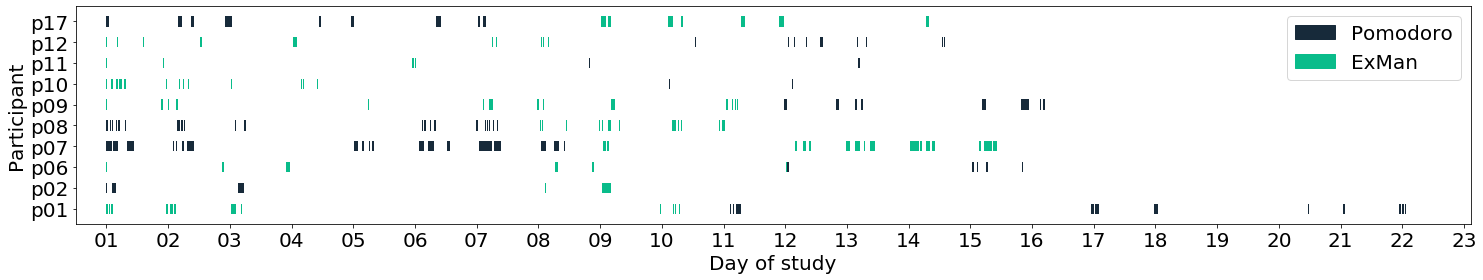

In [34]:
fig, gnt = plt.subplots() 

gnt.set_yticks([(i+0.25)*100 for i in range(len(focusStartEndTuplesPerParticipant))])
gnt.set_yticklabels(['p'+str(i['participant']) for i in focusStartEndTuplesPerParticipant]) 
  
# Declaring multiple bars in at same level and same width 
gnt.broken_barh(focusStartEndTuplesPerParticipant[0]['exman'], (0, 50), facecolors="#09BC8A")
gnt.broken_barh(focusStartEndTuplesPerParticipant[0]['pomodoro'], (0, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[1]['exman'], (100, 50), facecolors="#09BC8A")
gnt.broken_barh(focusStartEndTuplesPerParticipant[1]['pomodoro'], (100, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[2]['exman'], (200, 50), facecolors="#09BC8A") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[2]['pomodoro'], (200, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[3]['exman'], (300, 50), facecolors="#09BC8A") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[3]['pomodoro'], (300, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[4]['exman'], (400, 50), facecolors="#09BC8A") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[4]['pomodoro'], (400, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[5]['exman'], (500, 50), facecolors="#09BC8A") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[5]['pomodoro'], (500, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[6]['exman'], (600, 50), facecolors="#09BC8A") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[6]['pomodoro'], (600, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[7]['exman'], (700, 50), facecolors="#09BC8A") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[7]['pomodoro'], (700, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[8]['exman'], (800, 50), facecolors="#09BC8A") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[8]['pomodoro'], (800, 50), facecolors="#172A3A")

gnt.broken_barh(focusStartEndTuplesPerParticipant[9]['exman'], (900, 50), facecolors="#09BC8A") 
gnt.broken_barh(focusStartEndTuplesPerParticipant[9]['pomodoro'], (900, 50), facecolors="#172A3A")

#gnt.broken_barh(focusStartEndTuplesPerParticipant[10]['exman'], (1000, 50), facecolors="#09BC8A") 
#gnt.broken_barh(focusStartEndTuplesPerParticipant[10]['pomodoro'], (1000, 50), facecolors="#172A3A")

fig.set_figwidth(25)

navy_patch = mpatches.Patch(color='#172A3A', label='Pomodoro')
turqoise_patch = mpatches.Patch(color='#09BC8A', label='ExMan')

plt.legend(handles=[navy_patch, turqoise_patch], loc='top right', prop={'size': 20})
font = {"weight":"normal", "size":20}
plt.rc("font",**font)
plt.xlabel('Day of study')
plt.ylabel('Participant')

gnt.xaxis.set_major_locator(mdates.DayLocator())
gnt.xaxis.set_major_formatter(mdates.DateFormatter("%d"))

gnt.set_xlim(datetime.datetime.strptime('2020-11-30 12:00', '%Y-%m-%d %H:%M'))
plt.savefig('sessions_per_participant.pdf')

<h2> Viz 2: Timeline for each focus session </h2>

In [26]:
focusStartEndTuples = []

for focusSession in focusSessions:
    start = datetime.datetime.fromtimestamp(focusSession['startTime'] / 1e3)
    end = datetime.datetime.fromtimestamp(focusSession['endTime'] / 1e3)
    focusLength = end - start

    brokenFocusList = []
    notifications = []

    for brokenFocus in focusSession['brokenFocus']:
        if len(brokenFocus) == 2:
            brokenFocusStart = datetime.datetime.fromtimestamp(brokenFocus[0] / 1e3)
            brokenFocusEnd = datetime.datetime.fromtimestamp(brokenFocus[1] / 1e3)
            brokenFocusDuration = (brokenFocusEnd - brokenFocusStart).total_seconds() / 60

            if brokenFocusDuration <= 16.5:
                brokenFocusList.append(((brokenFocusStart - start).total_seconds() / 60, brokenFocusDuration))

    for service in focusSession['services']:
        for notification in service['messages']:
            notificationTime = datetime.datetime.fromtimestamp(notification['timestamp'] / 1e3)
            notifications.append((notificationTime - start).total_seconds() / 60)

    focusStartEndTuples.append({
        'participant': focusSession['participant'],
        'focus': [(0, focusLength.total_seconds() / 60)],
        'brokenFocus': brokenFocusList,
        'notifications': notifications,
        'version': focusSession['appVersion']
    })

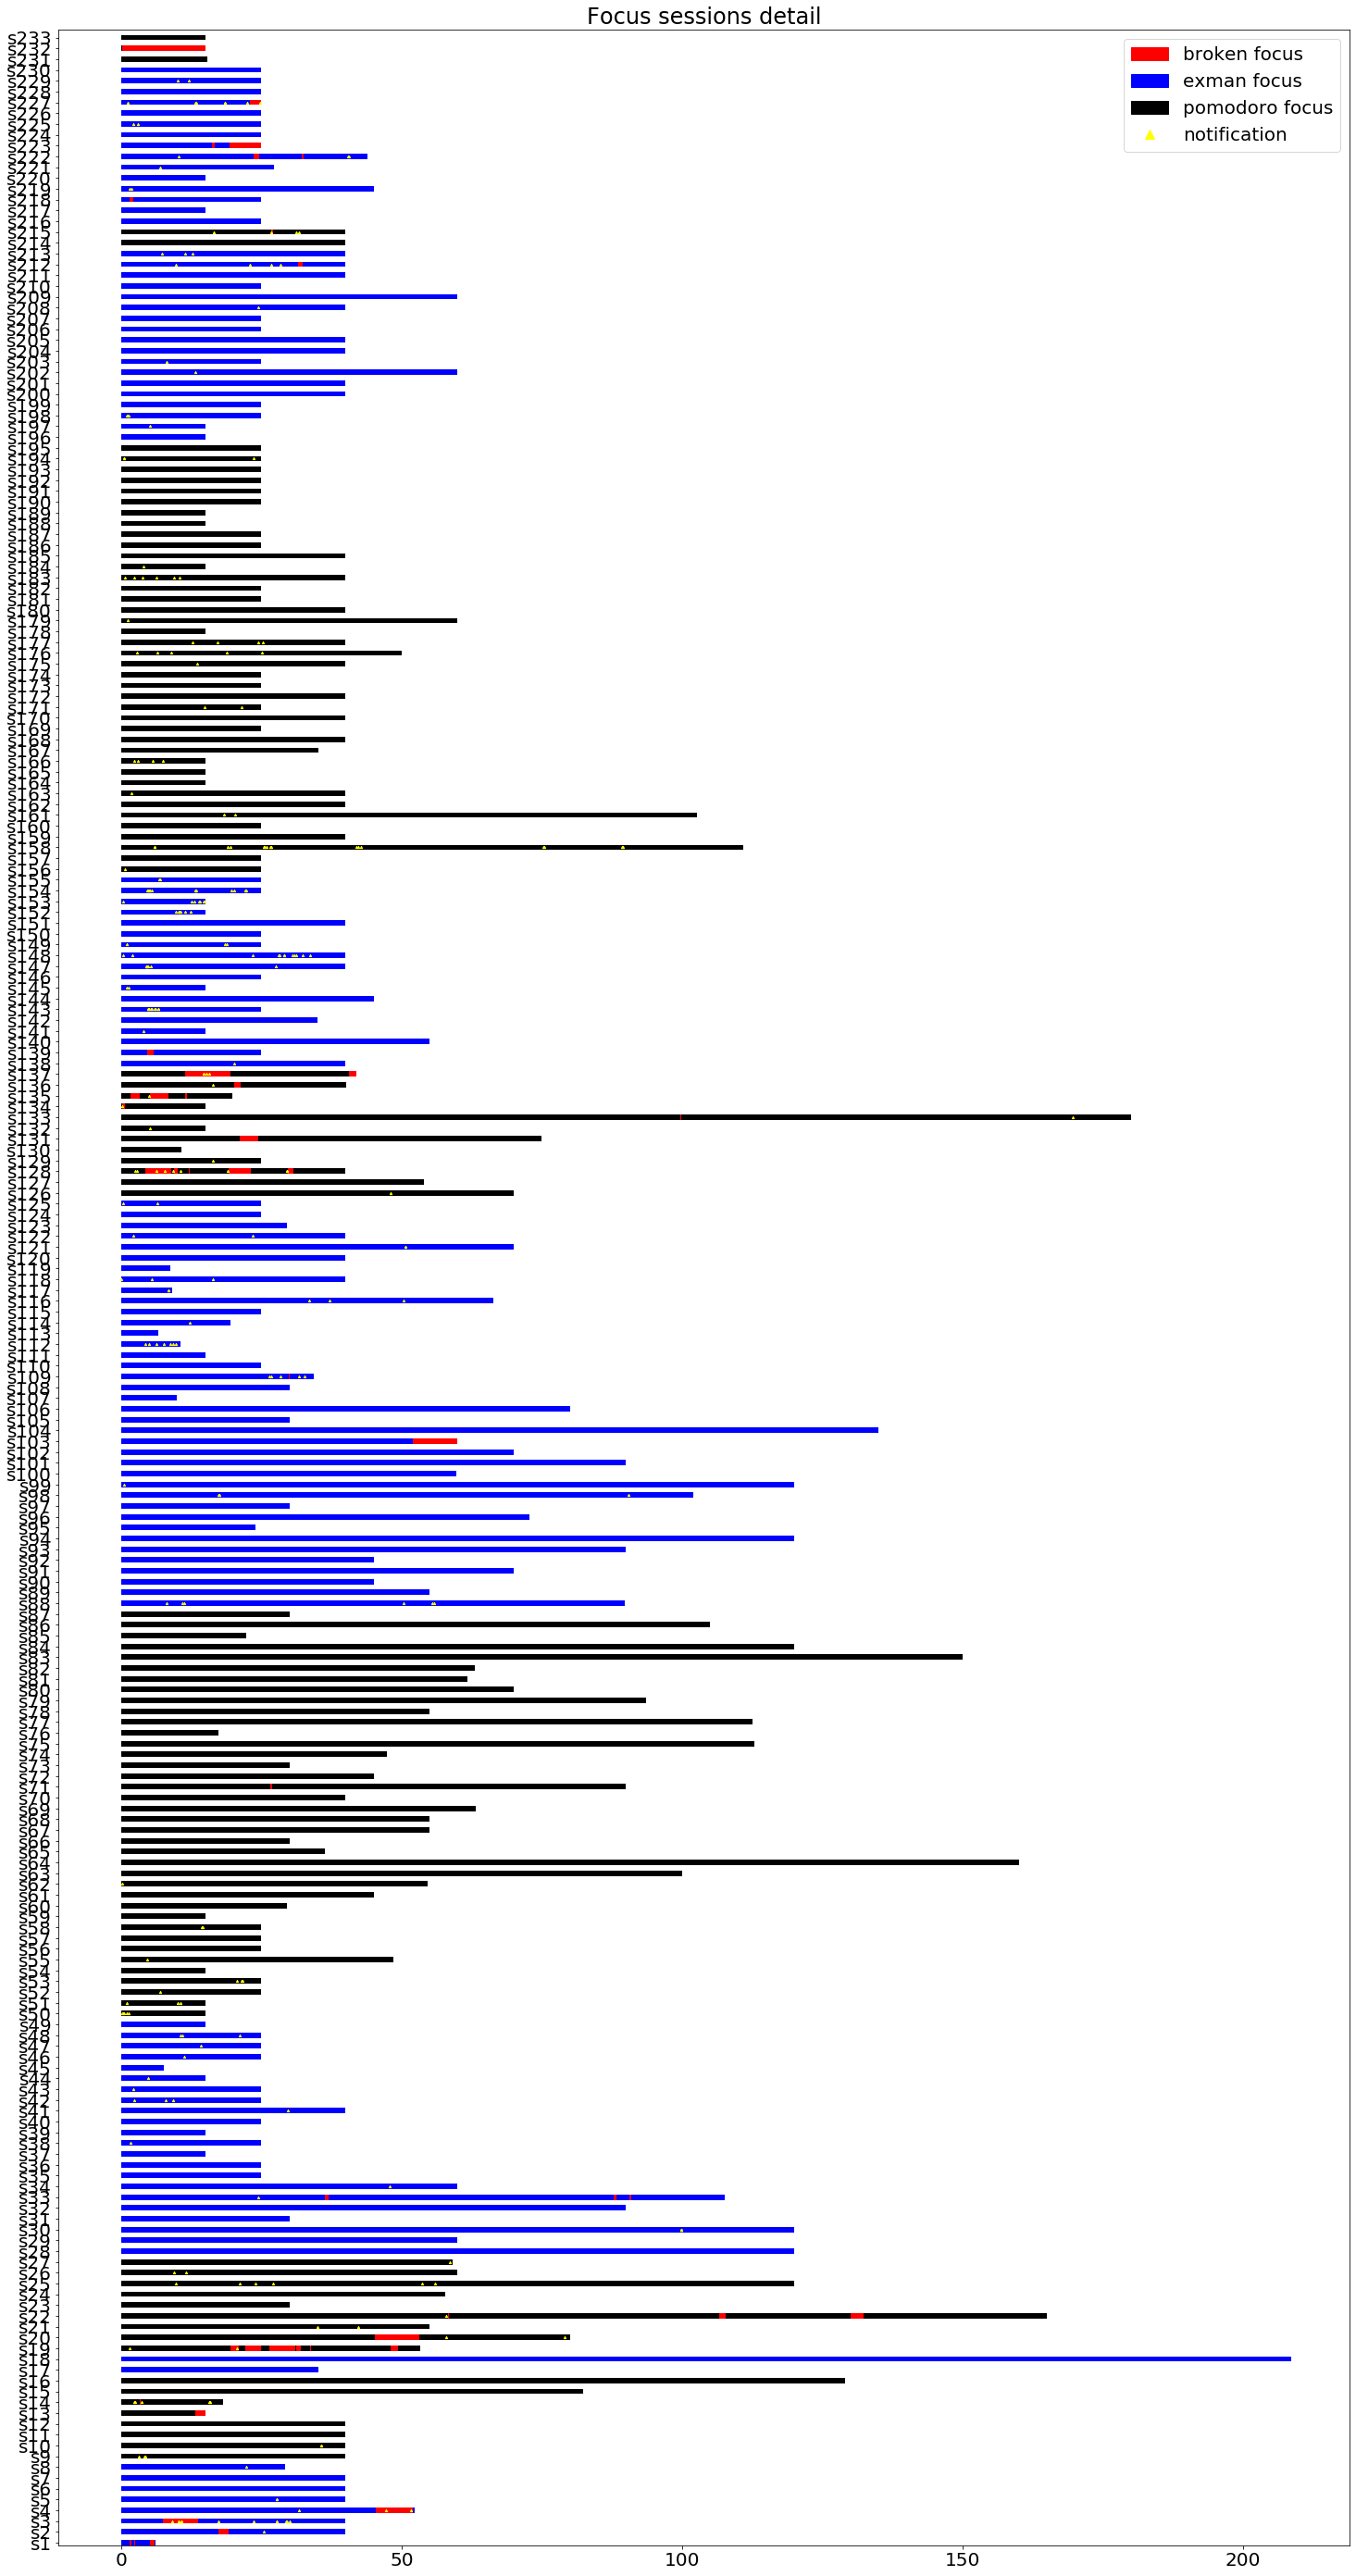

In [27]:
fig, gnt = plt.subplots() 

gnt.set_yticks([(i+0.25)*100 for i in range(len(focusStartEndTuples))])
gnt.set_ylim((0,len(focusStartEndTuples) * 100))
gnt.set_yticklabels(['s'+str(i+1) for i in range(len(focusStartEndTuples))]) 

# Declaring multiple bars in at same level and same width 
for i, focusSession in enumerate(focusStartEndTuples, start=0):
    if focusSession['version'] == 'exman':
        gnt.broken_barh(focusSession['focus'], (i*100, 50), facecolors="blue")
    else:
        gnt.broken_barh(focusSession['focus'], (i*100, 50), facecolors="black")

    gnt.broken_barh(focusSession['brokenFocus'], (i*100, 50), facecolors="red")
    notifications = focusSession['notifications']
    gnt.scatter(notifications, np.full_like(notifications,(i+0.25)*100), marker="^", s=5, color="yellow")

fig.set_figwidth(25)
fig.set_figheight(50)

plt.title("Focus sessions detail")
black_patch = mpatches.Patch(color='black', label='pomodoro focus')
blue_patch = mpatches.Patch(color='blue', label='exman focus')
red_patch = mpatches.Patch(color='red', label='broken focus')
notification_marker = mlines.Line2D([], [], color='yellow', marker='^', linestyle='None',
                          markersize=10, label='notification')


plt.legend(handles=[red_patch, blue_patch, black_patch, notification_marker], loc='top right', prop={'size': 20})
font = {"weight":"normal", "size":20}
plt.rc("font",**font)

plt.savefig('session_details.pdf')

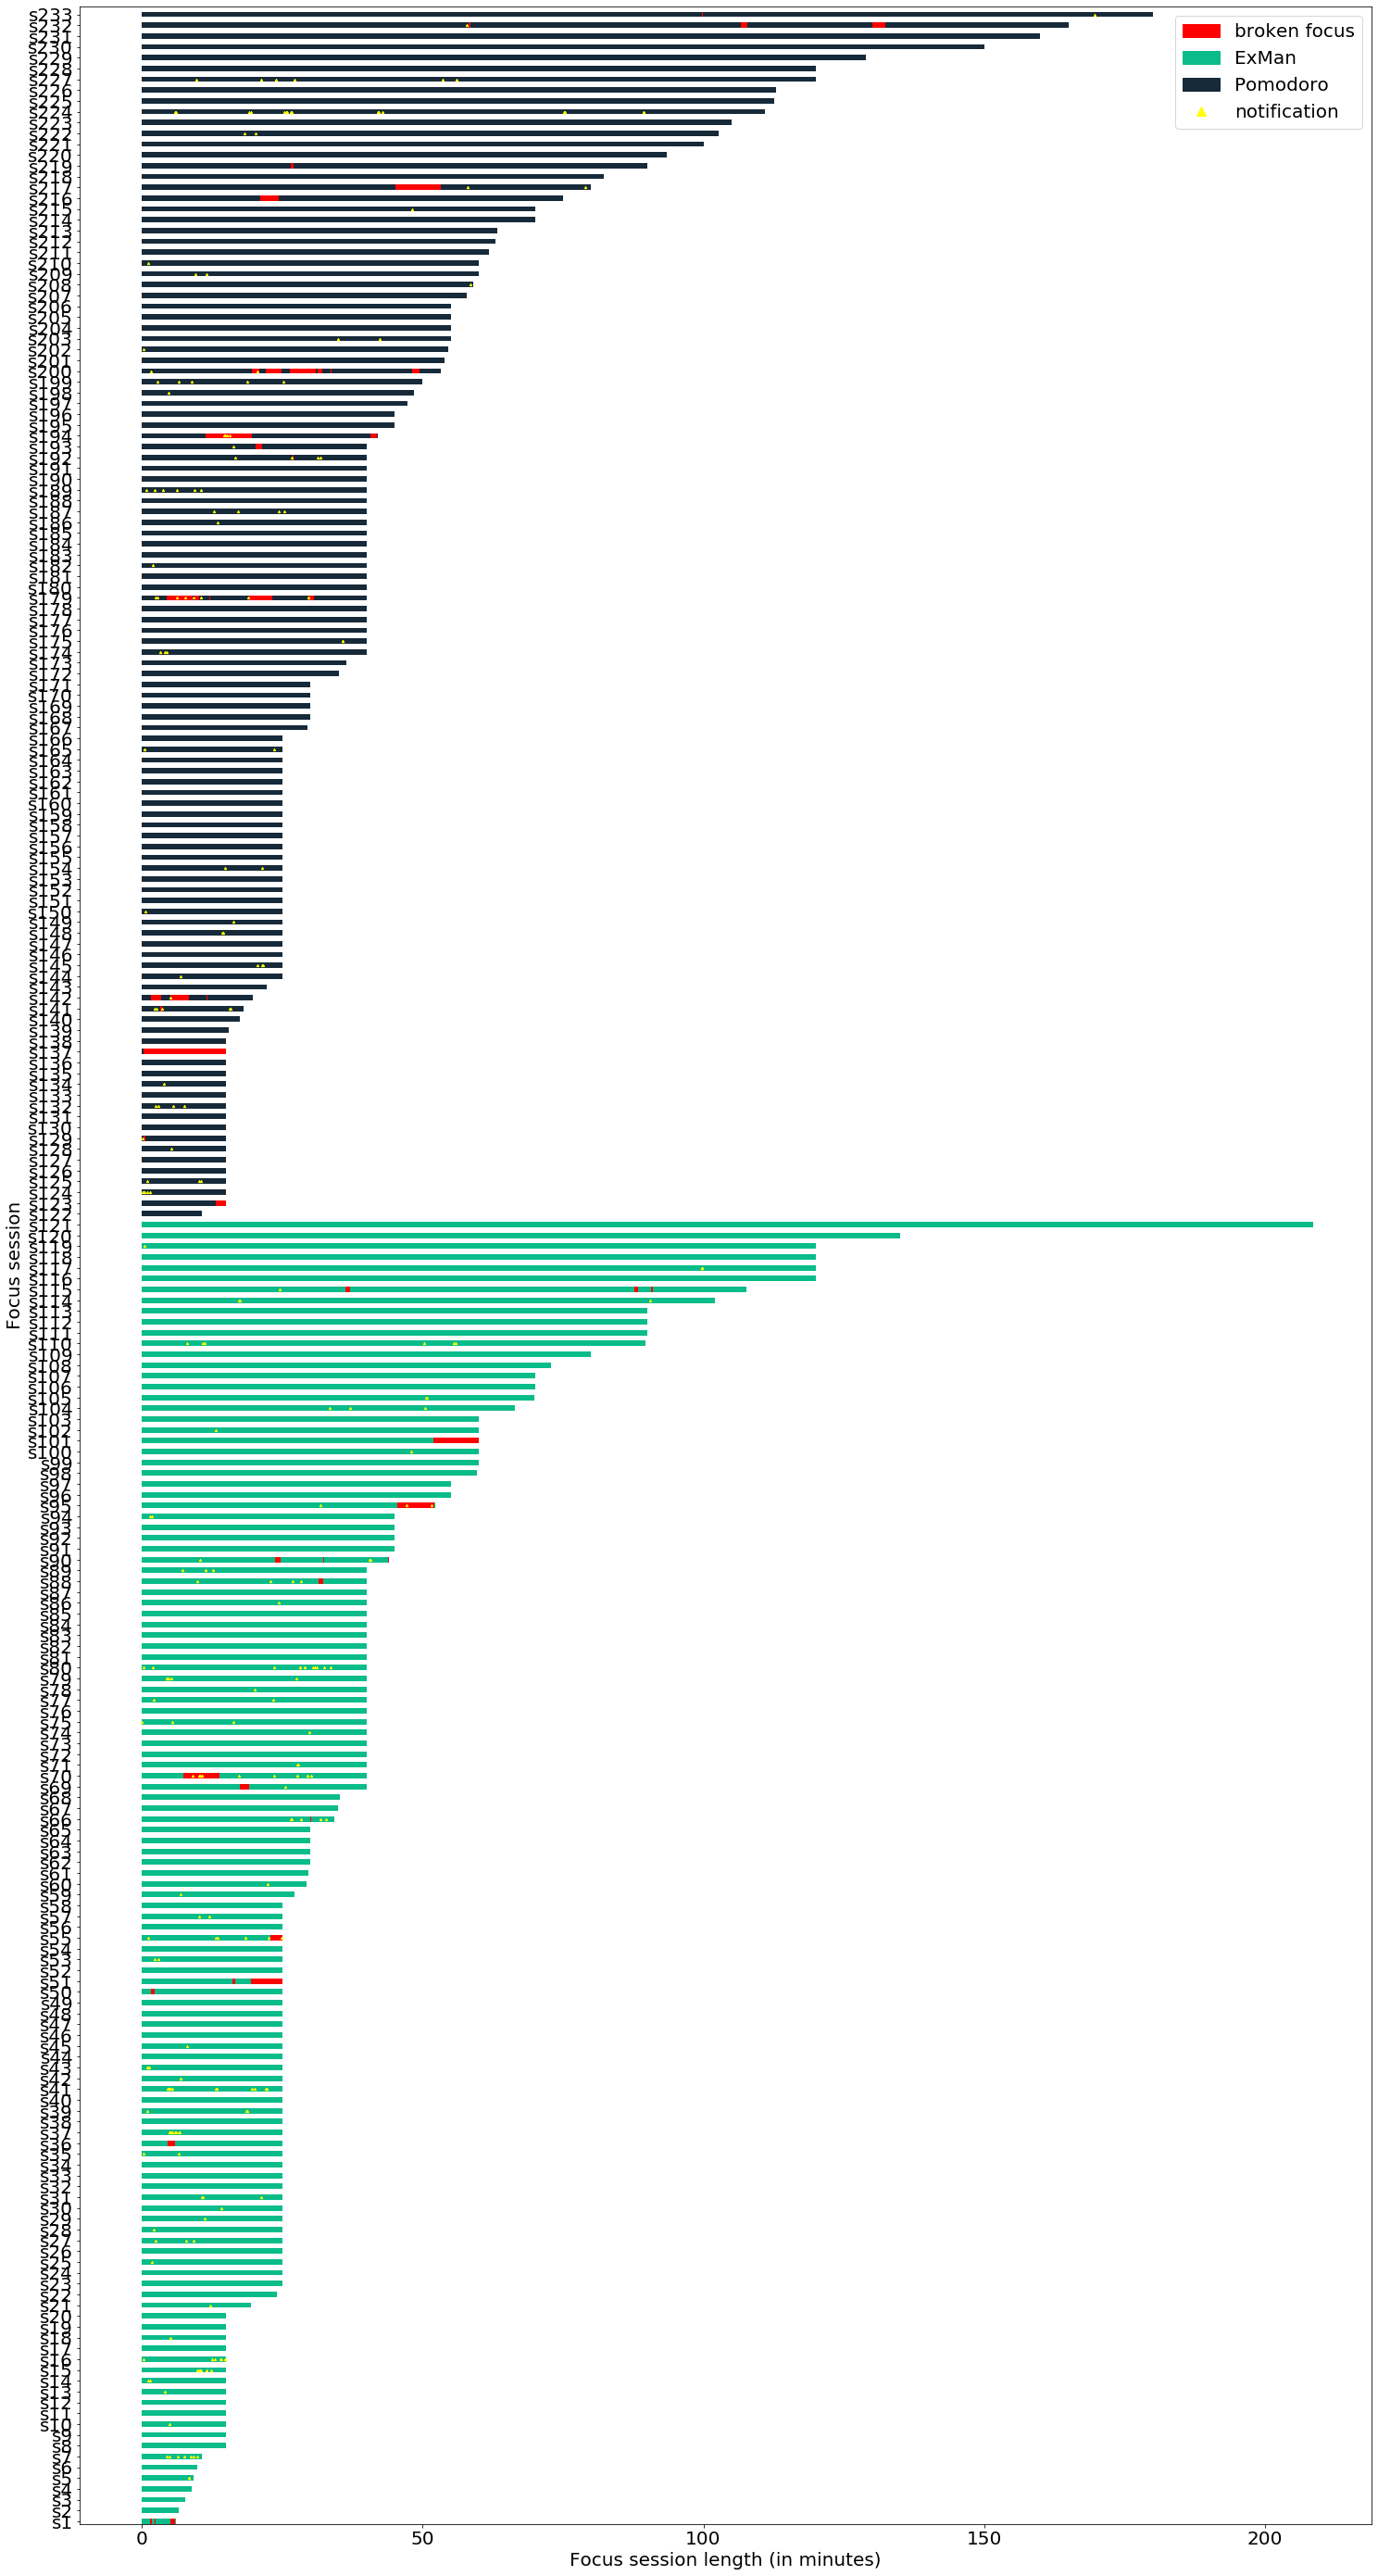

In [28]:
sortedByVersionAndLength = sorted(focusStartEndTuples, key=lambda k: (k['version'], k['focus'][0][1]))

fig, gnt = plt.subplots() 

gnt.set_yticks([(i+0.25)*100 for i in range(len(sortedByVersionAndLength))])
gnt.set_ylim((0,len(sortedByVersionAndLength) * 100))
gnt.set_yticklabels(['s'+str(i+1) for i in range(len(sortedByVersionAndLength))]) 

# Declaring multiple bars in at same level and same width 
for i, focusSession in enumerate(sortedByVersionAndLength, start=0):
    if focusSession['version'] == 'exman':
        gnt.broken_barh(focusSession['focus'], (i*100, 50), facecolors="#09BC8A")
    else:
        gnt.broken_barh(focusSession['focus'], (i*100, 50), facecolors="#172A3A")

    gnt.broken_barh(focusSession['brokenFocus'], (i*100, 50), facecolors="red")
    notifications = focusSession['notifications']
    gnt.scatter(notifications, np.full_like(notifications,(i+0.25)*100), marker="^", s=5, color="yellow")

fig.set_figwidth(25)
fig.set_figheight(50)

black_patch = mpatches.Patch(color='#172A3A', label='Pomodoro')
blue_patch = mpatches.Patch(color='#09BC8A', label='ExMan')
red_patch = mpatches.Patch(color='red', label='broken focus')
notification_marker = mlines.Line2D([], [], color='yellow', marker='^', linestyle='None',
                          markersize=10, label='notification')

plt.legend(handles=[red_patch, blue_patch, black_patch, notification_marker], loc='top right', prop={'size': 20})
font = {"weight":"normal", "size":20}
plt.rc("font",**font)
plt.ylabel('Focus session')
plt.xlabel('Focus session length (in minutes)')

plt.savefig('session_details_sorted_by_version_and_length.pdf')

